In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_theme()

# Data Loading

### Beer Advocate

In [3]:
df_ba_beers     = pd.read_csv('data/beer_advocate/beers.csv')
df_ba_breweries = pd.read_csv('data/beer_advocate/breweries.csv')
df_ba_users     = pd.read_csv('data/beer_advocate/users.csv')
df_ba_ratings   = pd.read_csv('data/beer_advocate/ratings.csv')

### Rate Beer

In [ ]:
df_rb_beers     = pd.read_csv('data/rate_beer/beers.csv')
df_rb_breweries = pd.read_csv('data/rate_beer/breweries.csv')
df_rb_users     = pd.read_csv('data/rate_beer/users.csv')
df_rb_ratings   = pd.read_csv('data/rate_beer/ratings.csv')

### Matched Beer Data

In [ ]:
df_ma_beers        = pd.read_csv('data/matched_beer_data/beers.csv',        header=[0, 1])
df_ma_breweries    = pd.read_csv('data/matched_beer_data/breweries.csv',    header=[0, 1])
df_ma_ratings      = pd.read_csv('data/matched_beer_data/ratings.csv',      header=[0, 1])
df_ma_users        = pd.read_csv('data/matched_beer_data/users.csv',        header=[0, 1])
df_ma_users_approx = pd.read_csv('data/matched_beer_data/users_approx.csv', header=[0, 1])

# Utilities

In [ ]:
# https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/
def compute_rating(df: pd.DataFrame) -> pd.Series:
    return 0.06 * df['appearance'] + 0.24 * df['aroma'] + 0.40 * df['taste'] + 0.10 * df['feel'] + 0.20 * df['overall']

# Should you trust reviews ?

The aim of this project is to analyze the reviews left by users on beers to see if they reflect reality and if we can rely on them to choose our next beer!

## You know, I am something of a beer expert myself

One of the metrics that will follow us throughout the project is the notion of user experience. Indeed, users with more experience in the world of beer may have more valuable opinions, sometimes different from the majority consensus on the site. The key question is how to evaluate the user experience.

We could also try to derive an "experience"-adjusted rating

## ????Where do we start ?

- First beer rated by users

## Are we influenced by the current rating of the beer ?

This section looks at the variation in ratings given as a function of the beer's current average at the time of rating.

This analysis can be differentiated according to the following variables:
- Beer style
- Beer country
- User experience (defined above)
- User country

## Are we influenced by our past ratings ?

This section looks at the influence of a user's past ratings on their current rating (are users converging more and more?).

This analysis can be differentiated according to the following variables:
- Beer style
- Beer country
- User experience (defined above)
- User country

## This beer is "okay"...

This section looks at the differences between textual comments and quantitative notes. In particular, is there a difference between users?

This analysis can be differentiated according to the following variables:
- Beer style
- Beer country
- User experience (defined above)
- User country

We will also try to derive an "sentiment"-corrected rating taking into account the disparancy

## I drink IPA by the way

This section looks at the influence of trends on user ratings (e.g. inflation due to a trend in IPAs).

This analysis can be differentiated according to the following variables:
- Beer style
- Beer country
- User experience (defined above)
- User country

# Data Exploration

<span style="background-color: red; color: white; padding: 1rem">TODO : Martin's code of data exploration (e.g. beer diversity)</span>

# 0. You know, I am something of a beer expert myself

One of the metrics that will follow us throughout the project is the notion of user experience. Indeed, users with more experience in the world of beer may have more valuable opinions, sometimes different from the majority consensus on the site. The key question is how to evaluate the user experience.

We could also try to derive an "experience"-adjusted rating

![Meme](src/utils/meme.jpg)

In [56]:
df_ba_ratings = df_ba_ratings.merge(df_ba_beers[['beer_id', 'beer_global_style']], on='beer_id', how='left')

In [57]:
df_ba_ratings = df_ba_ratings.sort_values(['user_id', 'beer_global_style', 'date'])

<span style="background-color: red; color: white; padding: 1rem">TODO : Compute Gini's using Martin's code</span>

# 1. Are we influenced by the current rating of the beer ?

<span style="background-color: red; color: white; padding: 1rem">TODO : Compute correlation using Martin's code</span>

In [51]:
df_rating_average_influence = df_ba_ratings[~df_ba_ratings['beer_past_ratings_average'].isna() & (df_ba_ratings['beer_past_ratings_count'] > 20)].copy()
df_rating_average_influence['rating_percent_difference'] = (df_rating_average_influence['rating'] - df_rating_average_influence['beer_past_ratings_average']) / df_rating_average_influence['beer_past_ratings_average'] * 100

In [47]:
df_rating_average_influence['rating_percent_difference'].mean()

-0.44423585111170893

As we could have expected, the average rating percentage difference is approximately null overall in the dataset. However, how does this value changes when we compare different groups of users ? For example, lets compare users with less than 10 ratings and those with more than 100 ratings.

In [ ]:
ALPHA = 0.01

t_test = stats.ttest_ind(
    df_rating_average_influence[df_rating_average_influence['user_past_ratings_count'] < 25 ]['rating_percent_difference'], 
    df_rating_average_influence[df_rating_average_influence['user_past_ratings_count'] > 1000]['rating_percent_difference'],
    equal_var=False
)

print(t_test)
print(df_rating_average_influence[df_rating_average_influence['user_past_ratings_count'] < 25 ]['rating_percent_difference'].mean())
print(df_rating_average_influence[df_rating_average_influence['user_past_ratings_count'] > 1000]['rating_percent_difference'].mean())

TtestResult(statistic=224.67904640691634, pvalue=0.0, df=1931303.3505887275)
2.092307304765812
-2.078847110961256


It seems that the average percentage difference to the current rating is statistically different between "unexperienced" and "experienced" users. Indeed, it seems that new users tend to inflate their rating compared to the current mean whereas experienced ones tend to decrease them slightly. 

## Beer Style

In [52]:
df_rating_average_influence = df_rating_average_influence.merge(df_ba_beers[['beer_id', 'beer_global_style']], on='beer_id', how='left')

In [54]:
df_rating_average_influence.groupby('beer_global_style')['rating_percent_difference'].mean().sort_values()

beer_global_style
Low Alcohol Beer   -2.465394
Pale Ale           -0.692733
India Pale Ale     -0.565327
Brown Ale          -0.560097
Porter             -0.511565
Pale Lager         -0.482936
Wheat Beer         -0.479557
Speciality Beer    -0.389480
Bock               -0.358719
Dark Ales          -0.334772
Hybrid Beer        -0.333210
Dark Lager         -0.299124
Strong Ale         -0.273668
Stout              -0.227658
Wild/Sour Beer     -0.168880
Name: rating_percent_difference, dtype: float64

In [ ]:
ALPHA = 0.01

t_test = stats.ttest_ind(
    df_rating_average_influence[df_rating_average_influence['beer_global_style'] == 'Low Alcohol Beer']['rating_percent_difference'], 
    df_rating_average_influence['rating_percent_difference'],
    equal_var=False
)

print(t_test)
print(df_rating_average_influence[df_rating_average_influence['beer_global_style'] == 'Low Alcohol Beer']['rating_percent_difference'].mean())
print(df_rating_average_influence['rating_percent_difference'].mean())

It seems that the Low Alcohol beers are not very liked by users who tend to always put a lower rating than the current one.

## User Country

In [ ]:
RATING_AVERAGE_USER_COUNTRY_MIN_COUNT = 5000

In [59]:
df_rating_average_influence = df_rating_average_influence.merge(df_ba_users[['user_id', 'user_country_code']], on='user_id', how='left')

In [ ]:
df_rating_average_influence_country = df_rating_average_influence.groupby('user_country_code')['rating_percent_difference'].agg(['mean', 'count'])
df_rating_average_influence_country[df_rating_average_influence_country['count'] > RATING_AVERAGE_USER_COUNTRY_MIN_COUNT].sort_values('count')

,mean,count
user_country_code,,
BRA,1.056974,5468
RUS,3.101841,6141
ESP,0.277253,6172
ROU,0.669656,9192
BEL,-2.959917,9332
DEU,-1.012819,11596
NLD,-2.186016,13843
SWE,-4.782483,16440
AUS,-1.314925,18148


In [72]:
ALPHA = 0.01

t_test = stats.ttest_ind(
    df_rating_average_influence[df_rating_average_influence['user_country_code'] == 'SWE']['rating_percent_difference'], 
    df_rating_average_influence['rating_percent_difference'],
    equal_var=False
)

print(t_test)
print(df_rating_average_influence[df_rating_average_influence['user_country_code'] == 'SWE']['rating_percent_difference'].mean())
print(df_rating_average_influence['rating_percent_difference'].mean())

TtestResult(statistic=-41.05253466207492, pvalue=0.0, df=16509.78054702646)
-4.782483205518361
-0.44423585111170893


It seems that our Swedish friends tend to grade more harshly than the average.

## Beer Style & User Country

In [106]:
RATING_AVERAGE_BEER_STYLE_USER_COUNTRY_MIN_COUNT = 250
RATING_AVERAGE_BEER_STYLE_USER_COUNTRY_MIN_PERCENT_DIFFERENCE = 1

In [107]:
df_ratings_bu = df_rating_average_influence.groupby(['beer_global_style', 'user_country_code'])['rating_percent_difference'].agg(['mean', 'count'])
df_ratings_bu = df_ratings_bu[df_ratings_bu['count'] > RATING_AVERAGE_BEER_STYLE_USER_COUNTRY_MIN_COUNT].reset_index()
df_ratings_bu = df_ratings_bu.pivot(index='beer_global_style', columns='user_country_code', values='mean').fillna(0)

<Axes: xlabel='user_country_code', ylabel='beer_global_style'>

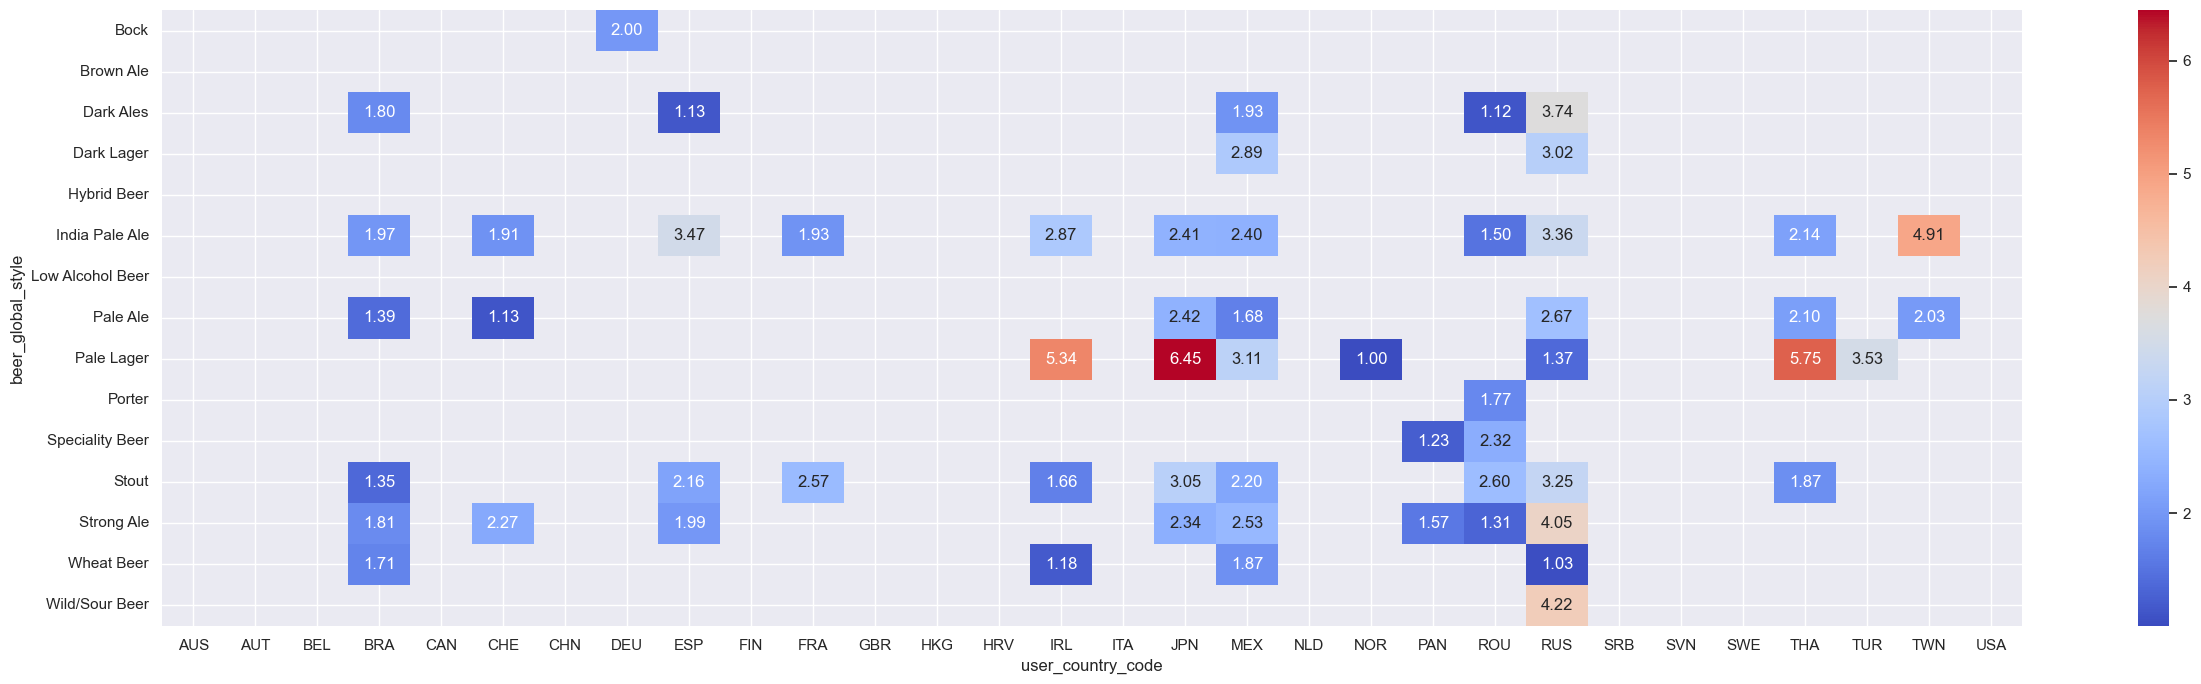

In [108]:
plt.figure(figsize=(30, 8))
sns.heatmap(df_ratings_bu, mask=np.abs(df_ratings_bu < RATING_AVERAGE_BEER_STYLE_USER_COUNTRY_MIN_PERCENT_DIFFERENCE), annot=True, fmt=".2f", cmap='coolwarm')

# 2. Are we influenced by our past ratings ?

<span style="background-color: red; color: white; padding: 1rem">TODO : Compute correlation using Martin's code</span>

In [225]:
df_ba_influence_past_user = df_ba_ratings[~df_ba_ratings['user_past_ratings_average'].isna() & (df_ba_ratings['user_past_ratings_count'] > 10)].sort_values(['user_id', 'date'])
df_ba_influence_past_user['difference_percentage'] = (df_ba_influence_past_user['rating'] - df_ba_influence_past_user['user_past_ratings_average']) / df_ba_influence_past_user['user_past_ratings_average'] * 100

/var/folders/3r/b57nvj3s7s78p6jf3jbfwxt80000gn/T/ipykernel_5998/361446726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ba_influence_past_user.groupby('user_past_ratings_count_bin')['difference_percentage'].mean().plot(kind='line')


<Axes: xlabel='user_past_ratings_count_bin'>

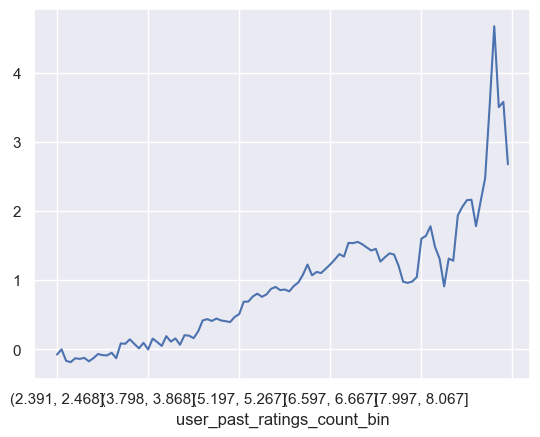

In [145]:
df_ba_influence_past_user['user_past_ratings_count_bin'] = pd.cut(np.log(df_ba_influence_past_user['user_past_ratings_count']), bins=100)
df_ba_influence_past_user.groupby('user_past_ratings_count_bin')['difference_percentage'].mean().plot(kind='line')

It seems that we are indeed more and more influenced by our past ratings. This chart is obtained by taking the log of the number of past ratings to obtain more meaningful bins since a lot of users didn't post much ratings.

## Beer Style

In [240]:
df_ba_influence_past_user = df_ba_influence_past_user.merge(df_ba_beers[['beer_id', 'beer_global_style']], on='beer_id', how='left')

In [147]:
df_ba_influence_past_user.groupby('beer_global_style')['difference_percentage'].mean().sort_values()

beer_global_style
Low Alcohol Beer   -32.384416
Pale Lager         -14.296718
Speciality Beer     -4.861424
Dark Lager          -3.651813
Hybrid Beer         -3.616190
Wheat Beer          -2.458687
Brown Ale           -1.000826
Pale Ale            -0.623975
Bock                 0.951083
Dark Ales            1.955273
Porter               2.700357
India Pale Ale       3.071980
Strong Ale           3.997702
Wild/Sour Beer       4.457477
Stout                5.285785
Name: difference_percentage, dtype: float64

In [148]:
ALPHA = 0.01

t_test = stats.ttest_ind(
    df_ba_influence_past_user[df_ba_influence_past_user['beer_global_style'] == 'Low Alcohol Beer']['difference_percentage'], 
    df_ba_influence_past_user['difference_percentage'],
    equal_var=False
)

print(t_test)
print(df_ba_influence_past_user[df_ba_influence_past_user['beer_global_style'] == 'Low Alcohol Beer']['difference_percentage'].mean())
print(df_ba_influence_past_user['difference_percentage'].mean())

TtestResult(statistic=-88.92176834998463, pvalue=0.0, df=3672.534542488894)
-32.38441574401833
0.7489547704693315


It seems that users tend to rate Low Alcohol beers lower than their previous ratings (all beer styles). But is it still true if we look only at their past rating for this style ?

In [ ]:
df_ba_influence_past_user_la = pd.merge(df_ba_ratings, df_ba_beers[['beer_id', 'beer_global_style']], on='beer_id', how='left')

df_ba_influence_past_user_la = df_ba_influence_past_user_la[df_ba_influence_past_user_la['beer_global_style'] == 'Low Alcohol Beer']
df_ba_influence_past_user_la = df_ba_influence_past_user_la[['user_id', 'beer_id', 'rating', 'date']]
df_ba_influence_past_user_la = df_ba_influence_past_user_la.sort_values(['user_id', 'date'])

df_ba_influence_past_user_la['user_past_ratings_count_la']   = df_ba_influence_past_user_la.groupby('user_id').cumcount()
df_ba_influence_past_user_la['user_past_ratings_average_la'] = df_ba_influence_past_user_la.groupby('user_id')['rating'].apply(lambda x: x.expanding().mean().shift()).reset_index(level=0, drop=True)

df_ba_influence_past_user_la = df_ba_influence_past_user_la[~df_ba_influence_past_user_la['user_past_ratings_average_la'].isna()]

df_ba_influence_past_user_la['difference_percentage'] = (df_ba_influence_past_user_la['rating'] - df_ba_influence_past_user_la['user_past_ratings_average_la']) / df_ba_influence_past_user_la['user_past_ratings_average_la'] * 100

df_ba_influence_past_user_la['difference_percentage'].mean()

5.404727629441429

Interestingly, we observe the opposite phenomenom when looking only at the past ratings of this style of beer.

<span style="background-color: red; color: white; padding: 1rem">TODO : It would be interesting to compute the above metric for all types of beer and look if we observe some changes</span>

## User Country

In [230]:
PAST_USER_RATINGS_COUNTRY_MIN_COUNT = 5000

In [228]:
df_ba_influence_past_user = df_ba_influence_past_user.merge(df_ba_users[['user_id', 'user_country_code']], on='user_id', how='left')

In [232]:
df_ba_influence_past_user_country = df_ba_influence_past_user.groupby('user_country_code')['difference_percentage'].agg(['mean', 'count'])
df_ba_influence_past_user_country[df_ba_influence_past_user_country['count'] > PAST_USER_RATINGS_COUNTRY_MIN_COUNT].sort_values('count', ascending=False)

,mean,count
user_country_code,,
USA,0.736330,6659322
CAN,1.094985,255800
GBR,0.449438,47519
AUS,1.677381,32219
SWE,-0.237100,28034
NLD,0.571553,21315
ROU,2.481863,16404
DEU,-0.278594,15387
BEL,0.512806,15043


In [234]:
ALPHA = 0.01

t_test = stats.ttest_ind(
    df_ba_influence_past_user[df_ba_influence_past_user['user_country_code'] == 'ROU']['difference_percentage'], 
    df_ba_influence_past_user['difference_percentage'],
    equal_var=False
)

print(t_test)
print(df_ba_influence_past_user[df_ba_influence_past_user['user_country_code'] == 'ROU']['difference_percentage'].mean())
print(df_ba_influence_past_user['difference_percentage'].mean())

TtestResult(statistic=14.798216691435698, pvalue=3.115077302594707e-49, df=16472.621462767296)
2.4818631548790697
0.7489547704693315


It seems that our Romanian friends tend to rate their beers better and better (2.48% better on average).

## Beer Style & User Country

In [235]:
PAST_USER_RATINGS_BSUC_MIN_COUNT = 250
PAST_USER_RATINGS_BSUC_DIFFERENCE_THRESHOLD = 1

In [242]:
df_ratings_bu = df_ba_influence_past_user.groupby(['beer_global_style', 'user_country_code'])['difference_percentage'].agg(['mean', 'count'])
df_ratings_bu = df_ratings_bu[df_ratings_bu['count'] > PAST_USER_RATINGS_BSUC_MIN_COUNT].reset_index()
df_ratings_bu = df_ratings_bu.pivot(index='beer_global_style', columns='user_country_code', values='mean').fillna(0)

<Axes: xlabel='user_country_code', ylabel='beer_global_style'>

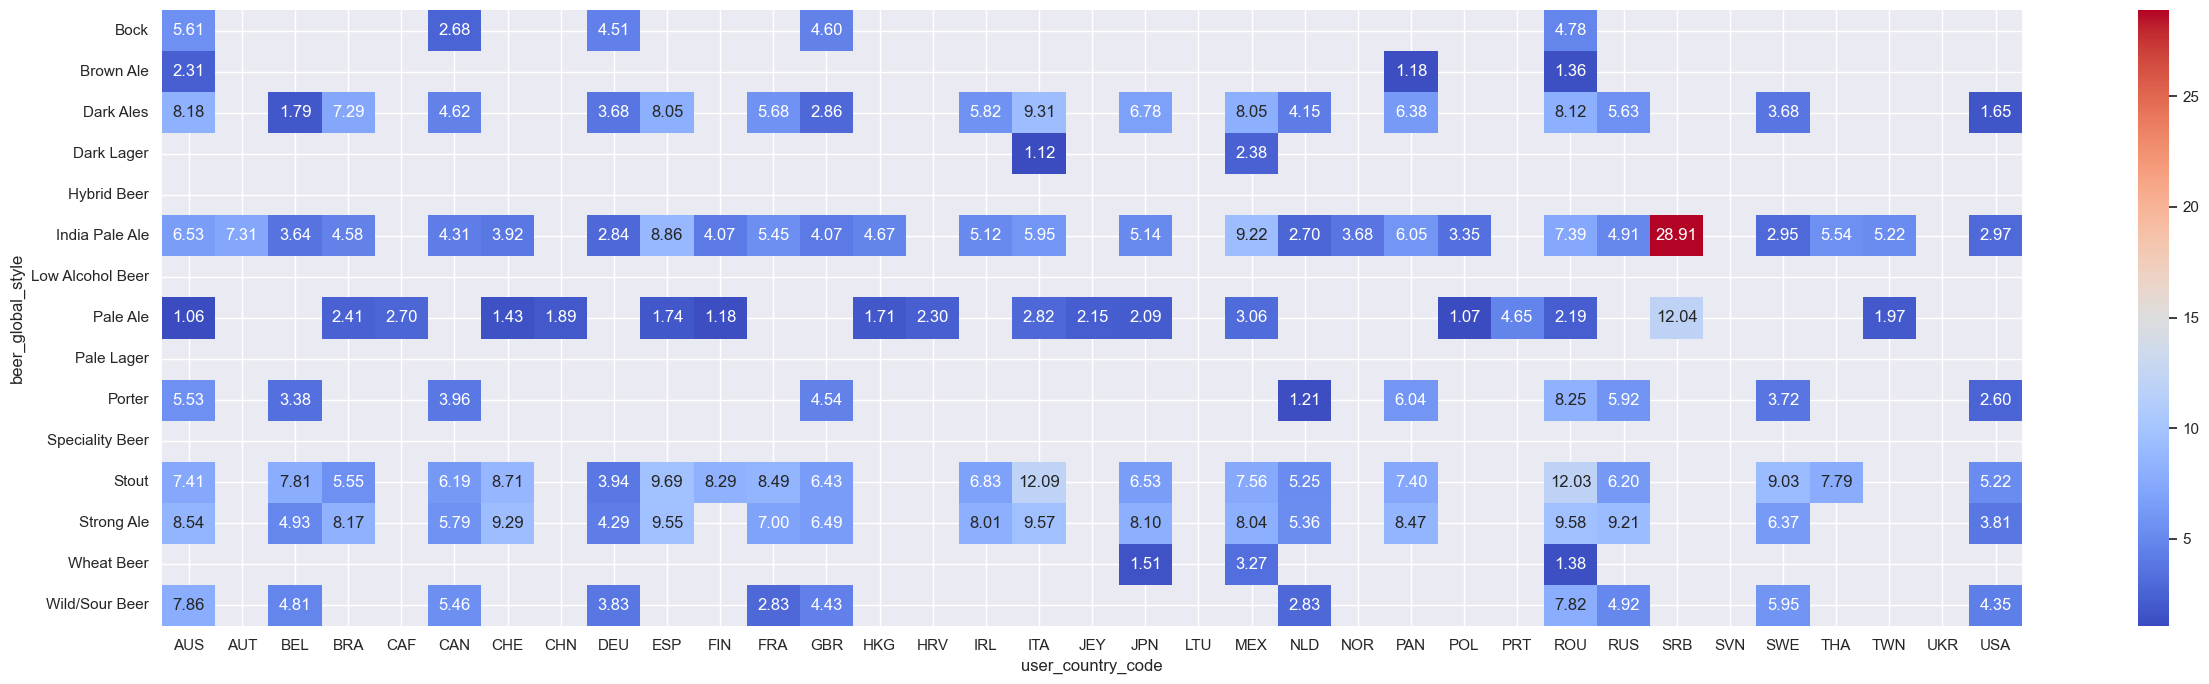

In [243]:
plt.figure(figsize=(30, 8))
sns.heatmap(df_ratings_bu, mask=np.abs(df_ratings_bu < PAST_USER_RATINGS_BSUC_DIFFERENCE_THRESHOLD), annot=True, fmt=".2f", cmap='coolwarm')

It seems that Serbian users rate IPA beers 28% better than their average ratings up to this point. We can also note that we don't observe any group with a negative trend, so the ratings tend to increase on average.

<span style="background-color: red; color: white; padding: 1rem">TODO : Look at idea that rating are increasing over time</span>

# 3. This beer is "okay"...

This section looks at the differences between textual comments and quantitative notes. In particular, is there a difference between users?

This analysis can be differentiated according to the following variables:
- Beer style
- Beer country
- User experience (defined above)
- User country

We will also try to derive an "sentiment"-corrected rating taking into account the disparancy

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax

NLP_MODEL = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = AutoTokenizer.from_pretrained(NLP_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(NLP_MODEL)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [22]:
df_ba_ratings_text = df_ba_ratings[(df_ba_ratings['text'].str.len() > 750)].sort_values(by='text', key=lambda x: x.str.len()).head(1000)

In [ ]:
inputs = tokenizer(df_ba_ratings_text['text'].tolist(), return_tensors="pt", padding=True, truncation=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

In [27]:
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
probs = softmax(outputs.logits, dim=1)

df_sentiment_results = pd.DataFrame({
    'sentiment_rating': torch.argmax(probs, dim=1).cpu().numpy(),
    'sentiment_confidence': torch.max(probs, dim=1).values.cpu().numpy()
}, index=df_ba_ratings_text.index)
df_sentiment_results = df_sentiment_results.merge(df_ba_ratings_text, left_index=True, right_index=True, how='left')

<Axes: >

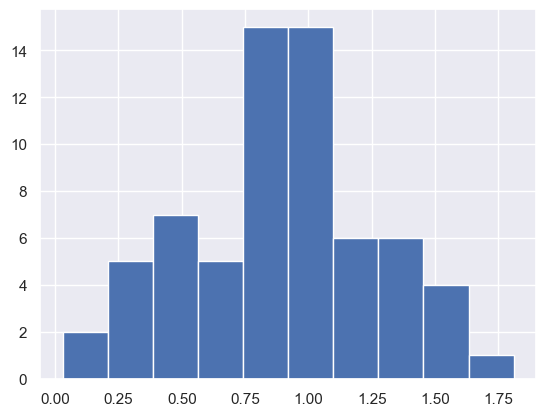

In [51]:
df_sentiment_results['sentiment_difference'] = df_sentiment_results['rating'] - df_sentiment_results['sentiment_rating']
df_sentiment_results[df_sentiment_results['sentiment_confidence'] > 0.75]['sentiment_difference'].hist()

There are only positive values so it seems that user are always more negative in their text review than in the final rating.

# 4. I drink IPA by the way

User ratings may be influenced by current beer trends. For example, IPAs have become very popular in recent years, and this trend could lead to an inflation in the number of ratings and create controversy. Indeed, more users would be able to taste this type of beer and give a rating, while others might want to “fight” the trend with more negative feedback. In any case, our hypothesis is that the presence of a tendency can reduce the objectivity and quality of the ratings.